<a href="https://colab.research.google.com/github/DanishJameel/Open_source/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ID                                    91 non-null     int64  
 1   Q1.AI_knowledge                       91 non-null     int64  
 2   Q2.AI_sources                         91 non-null     object 
 3   Q2#1.Internet                         91 non-null     int64  
 4   Q2#2.Books/Papers                     91 non-null     int64  
 5   Q2#3.Social_media                     91 non-null     int64  
 6   Q2#4.Discussions                      91 non-null     int64  
 7   Q2#5.NotInformed                      91 non-null     int64  
 8   Q3#1.AI_dehumanization                91 non-null     int64  
 9   Q3#2.Job_replacement                  91 non-null     int64  
 10  Q3#3.Problem_solving                  91 non-null     int64  
 11  Q3#4.AI_rulling_socie

<ipython-input-2-14982ea4d98c>:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["Q2.AI_sources"]=Q2_AI_sources
<ipython-input-2-14982ea4d98c>:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers["Q6.Domains"]=Q6_Domains


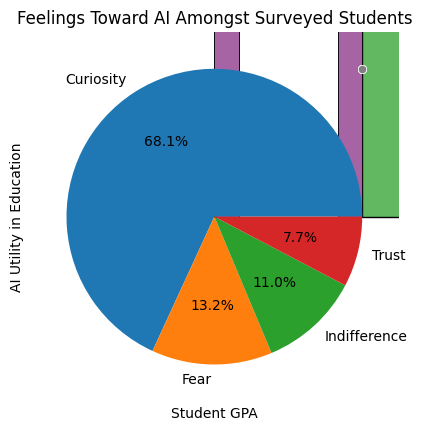

T-statistic: -1.445643685016533
P-value: 0.15001598845003974
Column: ID
T-statistic: 13.78721987378305
P-value: 5.537069181636276e-30
-------------------------
Column: Q1.AI_knowledge
T-statistic: -8.187906181580946
P-value: 4.7414232755431023e-14
-------------------------
Column: Q2#1.Internet
T-statistic: -63.399403352647035
P-value: 4.6772986593932824e-125
-------------------------
Column: Q2#2.Books/Papers
T-statistic: -65.3513725241396
P-value: 2.498309505666846e-127
-------------------------
Column: Q2#3.Social_media
T-statistic: -64.07870848364377
P-value: 7.447411913139726e-126
-------------------------
Column: Q2#4.Discussions
T-statistic: -68.77189323348692
P-value: 3.6501344233468206e-131
-------------------------
Column: Q2#5.NotInformed
T-statistic: -73.27514369781005
P-value: 5.946256699061454e-136
-------------------------
Column: Q3#1.AI_dehumanization
T-statistic: -33.12023353558514
P-value: 1.6795100264080253e-78
-------------------------
Column: Q3#2.Job_replacement


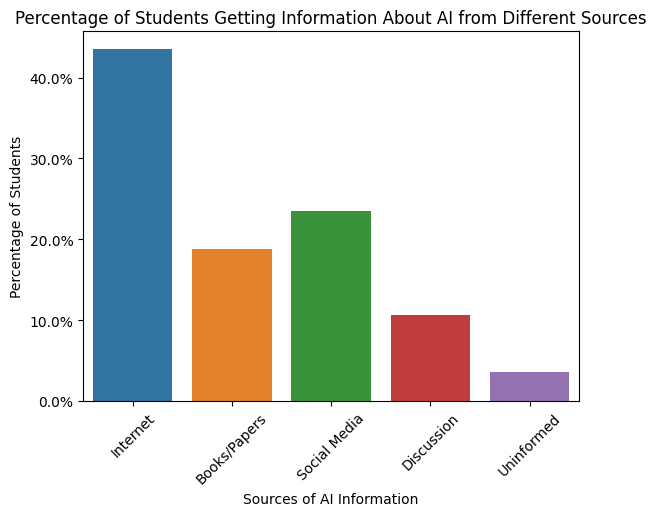

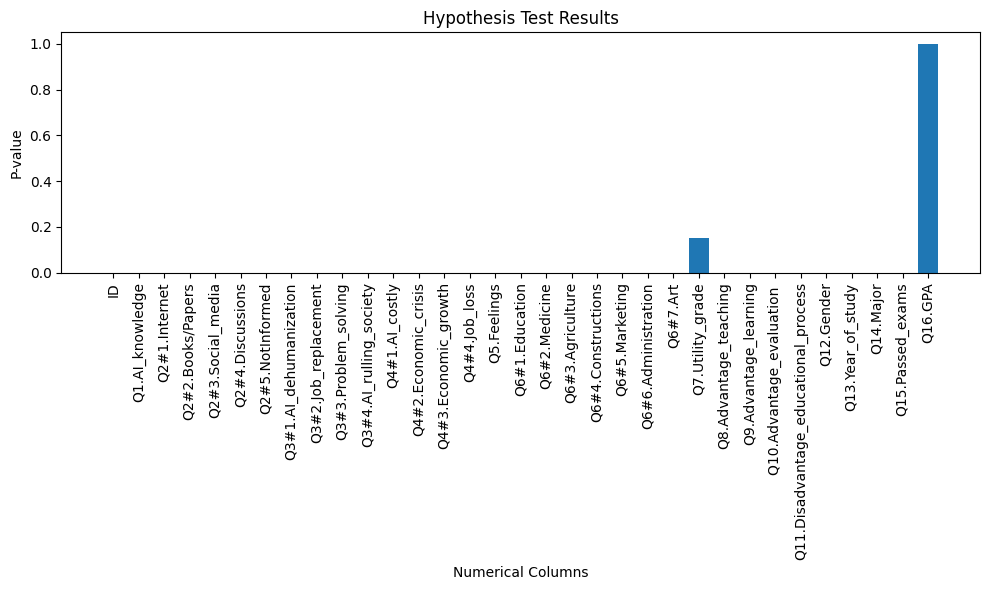

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#mport os
#os.chdir(r"G:\Datasets\test\d")

data = pd.read_csv("Survey_AI.csv")



df = data.copy()
df.head()


df.iloc[:,10:20]

df.info()

df.isnull().sum()

df["Q12.Gender"].unique

Q2_AI_sources=df["Q2.AI_sources"]

Q6_Domains = df["Q6.Domains"]

df_out=df.drop(["Q6.Domains","Q2.AI_sources"],axis=1)

from scipy import stats

# Assuming you have a DataFrame named 'df'

# Calculate z-scores for each column
z_scores = np.abs(stats.zscore(df_out))

# Define threshold for outlier detection (e.g., z-score > 3)
threshold = 2

# Find indices of outliers in each column
outlier_indices = np.where(z_scores > threshold)

# Remove outliers from DataFrame
df_no_outliers = df_out[(z_scores <= threshold).all(axis=1)]

# Print the outliers in each column
for col_idx, col_name in enumerate(df_out.columns):
    column_outliers = outlier_indices[0][outlier_indices[1] == col_idx]
    print(f"Outliers in column '{col_name}': {column_outliers}")

# Print the DataFrame after removing outliers
print("DataFrame after removing outliers:")
print(df_no_outliers)


df_no_outliers["Q2.AI_sources"]=Q2_AI_sources
df_no_outliers["Q6.Domains"]=Q6_Domains

df_no_outliers.info()

df_no_outliers.isnull().sum()

df_no_outliers.describe()



sns.histplot(data=df_no_outliers, x="Q16.GPA")


sns.histplot(data=df_no_outliers, x="Q3#3.Problem_solving")

sns.histplot(data=df_no_outliers, x="Q11.Disadvantage_educational_process")

sns.histplot(data=df_no_outliers, x="Q15.Passed_exams")

sns.histplot(data=df_no_outliers, x="Q2#2.Books/Papers")

sns.histplot(data=df_no_outliers, x="Q1.AI_knowledge")

sns.boxplot(data=df_no_outliers, x="Q1.AI_knowledge")


sns.boxplot(data=df_no_outliers, x="Q7.Utility_grade")


# GPA: 'Q16.GPA' (note: scale of 1-10)
# AI Sentiment: 'Q7.Utility_Grade' (note: scale of 1-10)
plot = sns.regplot(data=df[['Q16.GPA', 'Q7.Utility_grade']], x='Q16.GPA',
                       y='Q7.Utility_grade')
plot.set(xlabel='Student GPA', ylabel='AI Utility in Education',
        title='Perceived AI Utility in Education vs Student GPA')

sns.scatterplot(data=df_no_outliers, x="Q7.Utility_grade",y ="Q1.AI_knowledge")


sns.scatterplot(data=df_no_outliers, x="Q12.Gender",y ="Q13.Year_of_study")

sns.scatterplot(data=df_no_outliers, x="Q7.Utility_grade",y ="Q1.AI_knowledge")

df.columns
sns.scatterplot(data=df_no_outliers, x="Q4#3.Economic_growth",y ="Q4#2.Economic_crisis")

sentiment = df['Q5.Feelings'].value_counts()
labels = ['Curiosity', 'Fear', 'Indifference', 'Trust']
plt.pie(sentiment, labels=labels, autopct='%1.1f%%')
plt.title('Feelings Toward AI Amongst Surveyed Students')
plt.show()




# Getting count of AI info sources
source_sum = pd.DataFrame(df[['Q2#1.Internet', 'Q2#2.Books/Papers',
                              'Q2#3.Social_media', 'Q2#4.Discussions',
                              'Q2#5.NotInformed']].sum())

# Getting percentage of sample size
sample_size = source_sum[0].sum()

# Getting percentage column
source_sum[1] = source_sum[0] / sample_size * 100
# Library to convert floats -> percentages
import matplotlib.ticker as mtick

ax = sns.barplot(data=source_sum, x=source_sum.index, y=source_sum.columns[1])
ax.set(xlabel='Sources of AI Information', ylabel='Percentage of Students',
      title='Percentage of Students Getting Information About AI from Different Sources')
ax.set_xticklabels(['Internet', 'Books/Papers', 'Social Media', 'Discussion',
                      'Uninformed'], rotation=45)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

df.dtypes

# Extract the relevant columns for hypothesis testing
column1 = df['Q7.Utility_grade']
column2 = df['Q16.GPA']

# Perform the hypothesis test
t_statistic, p_value = stats.ttest_ind(column1, column2)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Get the numerical columns
numerical_columns = data.select_dtypes(include='number').columns

# Perform hypothesis test for each numerical column
for column in numerical_columns:
    # Extract the column data
    column_data = data[column]

    # Perform the hypothesis test
    t_statistic, p_value = stats.ttest_ind(column_data, data['Q16.GPA'])

    # Print the results
    print("Column:", column)
    print("T-statistic:", t_statistic)
    print("P-value:", p_value)
    print("-------------------------")

numerical_columns = df.select_dtypes(include='number').columns

# Initialize lists to store t-statistic and p-value for each column
t_statistics = []
p_values = []

# Perform hypothesis test for each numerical column
for column in numerical_columns:
    # Extract the column data
    column_data = data[column]

    # Perform the hypothesis test
    t_statistic, p_value = stats.ttest_ind(column_data, data['Q16.GPA'])

    # Append the results to the lists
    t_statistics.append(t_statistic)
    p_values.append(p_value)

# Create a bar plot to visualize the p-values
plt.figure(figsize=(10, 6))
plt.bar(numerical_columns, p_values)
plt.xlabel('Numerical Columns')

plt.ylabel('P-value')
plt.title('Hypothesis Test Results')
plt.xticks(rotation=90)  # Set the rotation angle to 90 degrees
plt.tight_layout()
plt.show()


<Axes: xlabel='Q7.Utility_grade', ylabel='Count'>

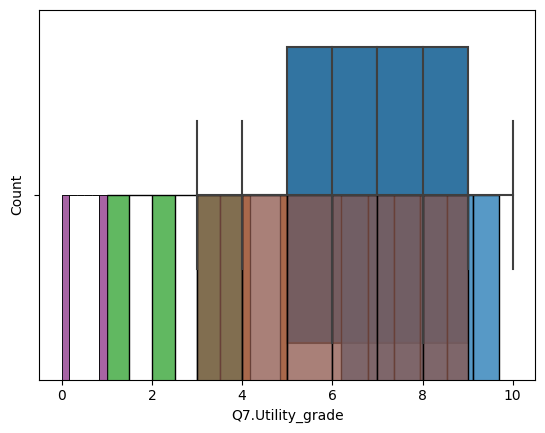

In [ ]:
sns.histplot(data=df_no_outliers, x="Q16.GPA")


sns.histplot(data=df_no_outliers, x="Q3#3.Problem_solving")

sns.histplot(data=df_no_outliers, x="Q11.Disadvantage_educational_process")

sns.histplot(data=df_no_outliers, x="Q15.Passed_exams")

sns.histplot(data=df_no_outliers, x="Q2#2.Books/Papers")

sns.histplot(data=df_no_outliers, x="Q1.AI_knowledge")

sns.boxplot(data=df_no_outliers, x="Q1.AI_knowledge")


sns.boxplot(data=df_no_outliers, x="Q7.Utility_grade")

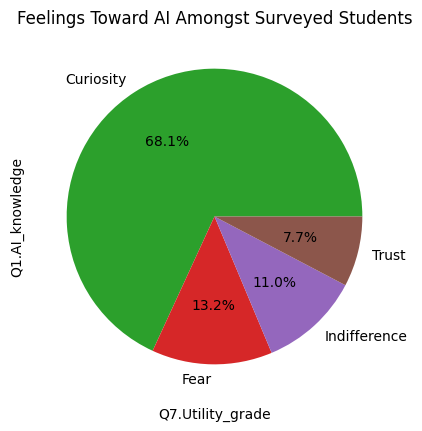

In [ ]:
sns.scatterplot(data=df_no_outliers, x="Q7.Utility_grade",y ="Q1.AI_knowledge")

df.columns
sns.scatterplot(data=df_no_outliers, x="Q4#3.Economic_growth",y ="Q4#2.Economic_crisis")

sentiment = df['Q5.Feelings'].value_counts()
labels = ['Curiosity', 'Fear', 'Indifference', 'Trust']
plt.pie(sentiment, labels=labels, autopct='%1.1f%%')
plt.title('Feelings Toward AI Amongst Surveyed Students')
plt.show()


<Axes: title={'center': 'Perceived AI Utility in Education vs Student GPA'}, xlabel='Student GPA', ylabel='AI Utility in Education'>

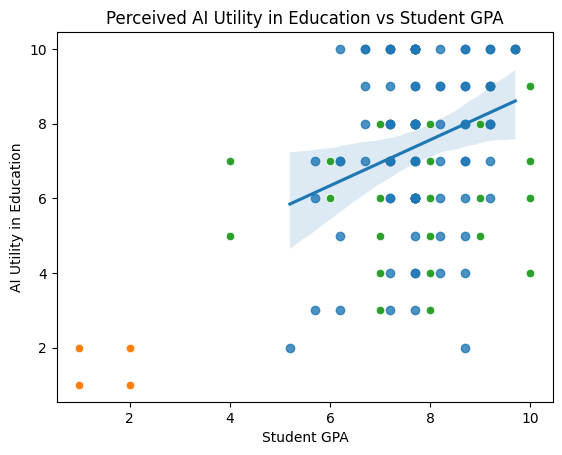

In [ ]:
# GPA: 'Q16.GPA' (note: scale of 1-10)
# AI Sentiment: 'Q7.Utility_Grade' (note: scale of 1-10)
plot = sns.regplot(data=df[['Q16.GPA', 'Q7.Utility_grade']], x='Q16.GPA',
                       y='Q7.Utility_grade')
plot.set(xlabel='Student GPA', ylabel='AI Utility in Education',
        title='Perceived AI Utility in Education vs Student GPA')

sns.scatterplot(data=df_no_outliers, x="Q7.Utility_grade",y ="Q1.AI_knowledge")


sns.scatterplot(data=df_no_outliers, x="Q12.Gender",y ="Q13.Year_of_study")

sns.scatterplot(data=df_no_outliers, x="Q7.Utility_grade",y ="Q1.AI_knowledge")


In [ ]:
pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 15.2 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 2.3.0
    Uninstalling Werkzeug-2.3.0:
      Successfully uninstalled Werkzeug-2.3.0
  Attempting uninstall: Flask
    Found existing installation: Flask 2.2.4
    Uninstalling Flask-2.2.4:
      Successfully uninstalled Flask-2.2.4


In [ ]:
!pip install pandas plotly dash


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data

,ID,Q1.AI_knowledge,Q2.AI_sources,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed,Q3#1.AI_dehumanization,Q3#2.Job_replacement,...,Q7.Utility_grade,Q8.Advantage_teaching,Q9.Advantage_learning,Q10.Advantage_evaluation,Q11.Disadvantage_educational_process,Q12.Gender,Q13.Year_of_study,Q14.Major,Q15.Passed_exams,Q16.GPA
0,1,8,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,1,2,...,9,3,1,2,3,1,2,2,1,9.2
1,2,7,Internet;Social media,1,0,1,0,0,2,3,...,6,2,2,1,2,2,2,2,1,7.7
2,3,5,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,2,1,...,6,3,3,3,4,2,2,2,0,7.2
3,4,5,Internet;Social media,1,0,1,0,0,4,4,...,9,1,2,2,3,1,2,2,1,8.2
4,5,4,Internet,1,0,0,0,0,1,2,...,8,3,2,3,4,1,2,2,1,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87,8,Internet,1,0,0,0,0,1,1,...,7,2,2,1,1,2,1,1,1,7.2
87,88,6,Social media,0,0,1,0,0,2,2,...,7,3,1,3,2,2,1,3,1,8.7
88,89,9,Books/Scientific papers (physical/online format),0,1,0,0,0,1,1,...,10,1,2,3,1,2,1,1,0,6.2
89,90,2,I don't inform myself about AI,0,0,0,0,1,2,4,...,2,2,3,1,2,2,1,1,1,8.7


In [ ]:
data

,ID,Q1.AI_knowledge,Q2.AI_sources,Q2#1.Internet,Q2#2.Books/Papers,Q2#3.Social_media,Q2#4.Discussions,Q2#5.NotInformed,Q3#1.AI_dehumanization,Q3#2.Job_replacement,...,Q7.Utility_grade,Q8.Advantage_teaching,Q9.Advantage_learning,Q10.Advantage_evaluation,Q11.Disadvantage_educational_process,Q12.Gender,Q13.Year_of_study,Q14.Major,Q15.Passed_exams,Q16.GPA
0,1,8,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,1,2,...,9,3,1,2,3,1,2,2,1,9.2
1,2,7,Internet;Social media,1,0,1,0,0,2,3,...,6,2,2,1,2,2,2,2,1,7.7
2,3,5,Internet;Books/Scientific papers (physical/onl...,1,1,0,0,0,2,1,...,6,3,3,3,4,2,2,2,0,7.2
3,4,5,Internet;Social media,1,0,1,0,0,4,4,...,9,1,2,2,3,1,2,2,1,8.2
4,5,4,Internet,1,0,0,0,0,1,2,...,8,3,2,3,4,1,2,2,1,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,87,8,Internet,1,0,0,0,0,1,1,...,7,2,2,1,1,2,1,1,1,7.2
87,88,6,Social media,0,0,1,0,0,2,2,...,7,3,1,3,2,2,1,3,1,8.7
88,89,9,Books/Scientific papers (physical/online format),0,1,0,0,0,1,1,...,10,1,2,3,1,2,1,1,0,6.2
89,90,2,I don't inform myself about AI,0,0,0,0,1,2,4,...,2,2,3,1,2,2,1,1,1,8.7


In [ ]:
import pandas as pd
import plotly.subplots as sp
import plotly.graph_objects as go
import plotly.express as px

# Assuming the dataset is stored in a DataFrame called "df"
df = pd.read_csv('/content/Survey_AI.csv')

# Create subplots with a 2x2 grid layout
fig = sp.make_subplots(rows=2, cols=2, subplot_titles=("AI Knowledge Distribution", "Utility Grade Distribution",
                                                      "AI Dehumanization vs. Job Replacement", "Correlation Matrix"))

# Plot 1: AI Knowledge Distribution (Histogram)
fig.add_trace(go.Histogram(x=df['Q1.AI_knowledge'], nbinsx=10), row=1, col=1)

# Plot 2: Utility Grade Distribution (Bar plot)
fig.add_trace(go.Bar(x=df['Q7.Utility_grade'], y=df.index), row=1, col=2)

# Plot 3: AI Dehumanization vs. Job Replacement (Scatter plot)
fig.add_trace(go.Scatter(x=df['Q3#1.AI_dehumanization'], y=df['Q3#2.Job_replacement'], mode='markers'), row=2, col=1)

# Plot 4: Correlation Matrix (Heatmap)
fig.add_trace(go.Heatmap(z=df.corr(), x=df.columns, y=df.columns, colorscale='Viridis'), row=2, col=2)

# Additional Plot: Counts of Feelings Toward AI
counts = df['Q5.Feelings'].value_counts()
fig.add_trace(go.Bar(x=counts.index, y=counts.values), row=2, col=2)

# Update layout and title
fig.update_layout(height=600, width=800, title_text="Visualization Dashboard")

# Show the dashboard
fig.show()


<ipython-input-17-0a6ffa617187>:23: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

